# model.ipynb

## Packages

In [1]:
# Load packages
import pandas as pd
import numpy as np
import sklearn as sk
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import dataframe_image as dfi

## Datasets

In [2]:
salariesStats = pd.read_csv("data/salariesStats.csv") # Final Dataframe
salariesStats = salariesStats.drop(columns = ['Unnamed: 0'])
df = salariesStats
df = df.loc[df['season_end'] != 2020]
df

,player_id,salary,season_end,season_start,name,G,GS,FGM,FGA,FG%,...,BLK.1,TO.1,PF.1,PTS.1,rookie?,champion,college,draft_year,primaryPosition,secondaryPosition
0,abdelal01,395000.0,1991,1990,Alaa Abdelnaby,43.0,0.0,55.0,116.0,0.5,...,0.3,0.5,0.9,3.1,1,0,Duke University,1990,PowerForward,0
1,abdelal01,494000.0,1992,1991,Alaa Abdelnaby,71.0,1.0,178.0,361.0,0.5,...,0.2,0.9,1.9,6.1,0,0,Duke University,1990,PowerForward,0
2,abdelal01,500000.0,1993,1992,Alaa Abdelnaby,75.0,52.0,245.0,473.0,0.5,...,0.3,1.3,2.5,7.7,0,0,Duke University,1990,PowerForward,0
3,abdelal01,805000.0,1994,1993,Alaa Abdelnaby,13.0,0.0,24.0,55.0,0.4,...,0.2,1.3,1.5,4.9,0,0,Duke University,1990,PowerForward,0
4,abdelal01,650000.0,1995,1994,Alaa Abdelnaby,54.0,0.0,118.0,231.0,0.5,...,0.2,0.8,1.9,4.7,0,0,Duke University,1990,PowerForward,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12390,willial03,77250.0,2019,2018,Alan Williams,5.0,0.0,8.0,13.0,0.6,...,0.0,0.2,0.4,3.6,0,0,"University of California, Santa Barbara",undrafted,PowerForward,Center
12391,willijo04,127250.0,2019,2018,Johnathan Williams,24.0,0.0,65.0,110.0,0.6,...,0.3,0.7,2.6,6.5,1,0,"University of Missouri, Gonzaga University",undrafted,Center,0
12392,willike04,838464.0,2019,2018,Kenrich Williams,46.0,29.0,107.0,279.0,0.4,...,0.4,0.8,2.1,6.1,1,0,Texas Christian University,undrafted,SmallForward,0
12393,willitr02,77250.0,2019,2018,Troy Williams,21.0,0.0,44.0,98.0,0.4,...,0.4,0.4,1.8,5.3,0,0,Indiana University,undrafted,SmallForward,0


## Test correlations

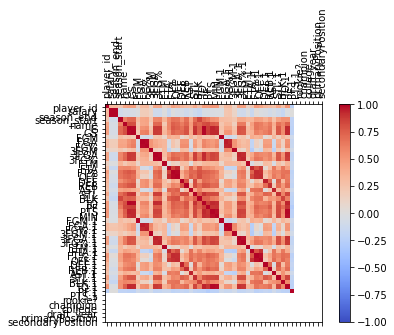

In [3]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.savefig('images/heatMap1.png', dpi=200, transparent = True)  
plt.show()

In [4]:
correlations = df.corr()
correlations.sort_values(by = ['salary'], ascending=False).head(20)

,salary,season_end,season_start,G,GS,FGM,FGA,FG%,3FGM,3FGA,...,OFF.1,DEF.1,REB.1,AST.1,STL.1,BLK.1,TO.1,PF.1,PTS.1,rookie?
salary,1.000000,0.319626,0.319626,0.237459,0.431594,0.462980,0.455784,0.144900,0.320289,0.330302,...,0.240486,0.497289,0.435262,0.340213,0.308599,0.265295,0.429820,0.272060,0.521716,-0.233971
PTS.1,0.521716,-0.020043,-0.020043,0.532201,0.748285,0.931310,0.928947,0.255735,0.546060,0.564104,...,0.399617,0.666988,0.609661,0.633662,0.692966,0.325991,0.846247,0.570340,1.000000,-0.225601
FGM.1,0.512848,-0.033978,-0.033978,0.542075,0.759627,0.940735,0.930217,0.291954,0.487372,0.505697,...,0.446020,0.692279,0.643338,0.612288,0.682985,0.360746,0.834914,0.592203,0.989453,-0.226566
FGA.1,0.504241,-0.025679,-0.025679,0.521152,0.741055,0.917808,0.932067,0.175298,0.554304,0.580081,...,0.362959,0.635411,0.574794,0.649167,0.706676,0.285869,0.843592,0.557797,0.982850,-0.219699
DEF.1,0.497289,0.036083,0.036083,0.472778,0.663122,0.665592,0.622049,0.349651,0.144539,0.155532,...,0.788638,1.000000,0.978032,0.270819,0.440520,0.661167,0.597340,0.687620,0.666988,-0.220577
MIN,0.473905,-0.041846,-0.041846,0.643492,0.833156,0.865925,0.872850,0.250583,0.518522,0.538511,...,0.476136,0.727558,0.678621,0.665189,0.762685,0.370824,0.825195,0.699021,0.896294,-0.273761
PTS,0.471836,-0.047349,-0.047349,0.699135,0.805078,0.992628,0.989043,0.247737,0.583483,0.601096,...,0.398168,0.644970,0.593507,0.606615,0.672323,0.323438,0.790884,0.559874,0.941800,-0.215380
FGM,0.462980,-0.059623,-0.059623,0.708773,0.814700,1.000000,0.989324,0.272616,0.531002,0.548993,...,0.436705,0.665592,0.621204,0.587732,0.662929,0.351398,0.780195,0.577080,0.931310,-0.215910
FTM.1,0.460327,-0.084794,-0.084794,0.421485,0.635256,0.801899,0.793745,0.214375,0.349012,0.371999,...,0.410823,0.613950,0.575737,0.559295,0.600730,0.331537,0.806964,0.519281,0.901233,-0.181273
FTA.1,0.458917,-0.098334,-0.098334,0.418961,0.638270,0.793271,0.775096,0.250551,0.282177,0.306431,...,0.496518,0.666201,0.641885,0.521562,0.587161,0.407625,0.808297,0.559648,0.884348,-0.174449


That's way too complex! However, there do seem to be some strong correlations

In [5]:
# Let's refine down some of the categories
# Top variables correlated to salary
modelDF = salariesStats[['salary','PTS.1','FGM.1','FGA.1','DEF.1','MIN','PTS','FTM.1','FTA.1','FGM','FGA','DEF','REB.1','TO.1','FTM','FTA','GS','REB','TO','AST.1']]
modelDF

,salary,PTS.1,FGM.1,FGA.1,DEF.1,MIN,PTS,FTM.1,FTA.1,FGM,FGA,DEF,REB.1,TO.1,FTM,FTA,GS,REB,TO,AST.1
0,395000.0,3.1,1.3,2.7,1.4,6.7,135.0,0.6,1.0,55.0,116.0,62.0,2.1,0.5,25.0,44.0,0.0,89.0,22.0,0.3
1,494000.0,6.1,2.5,5.1,2.5,13.2,432.0,1.1,1.4,178.0,361.0,179.0,3.7,0.9,76.0,101.0,1.0,260.0,66.0,0.4
2,500000.0,7.7,3.3,6.3,2.8,17.5,578.0,1.2,1.5,245.0,473.0,211.0,4.5,1.3,88.0,116.0,52.0,337.0,97.0,0.4
3,805000.0,4.9,1.8,4.2,2.6,12.2,64.0,1.2,1.9,24.0,55.0,34.0,3.5,1.3,16.0,25.0,0.0,46.0,17.0,0.2
4,650000.0,4.7,2.2,4.3,1.4,9.4,256.0,0.4,0.6,118.0,231.0,77.0,2.1,0.8,20.0,35.0,0.0,114.0,45.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,1445697.0,6.9,2.3,5.1,1.7,19.3,487.0,1.8,1.9,162.0,362.0,122.0,2.0,1.1,126.0,136.0,1.0,144.0,76.0,2.5
12745,79568.0,2.0,0.8,1.9,0.7,5.8,36.0,0.2,0.4,15.0,34.0,13.0,1.1,0.1,3.0,8.0,0.0,20.0,2.0,0.3
12746,161245.0,3.0,1.3,2.3,2.7,12.0,45.0,0.5,0.9,19.0,34.0,40.0,4.3,0.3,7.0,13.0,6.0,64.0,5.0,0.5
12747,1416852.0,3.5,1.3,3.8,3.5,21.3,136.0,0.2,0.7,51.0,147.0,135.0,4.8,0.6,9.0,26.0,18.0,186.0,22.0,1.5


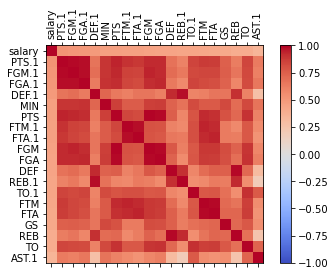

In [6]:
corr = modelDF.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(modelDF.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(modelDF.columns)
ax.set_yticklabels(modelDF.columns)
plt.savefig('images/heatMap2.png', dpi=300, transparent = True)  
plt.show()

In [7]:
correlations = modelDF.corr().round(2)
dfi.export(correlations, 'images/correlations.png')
correlations

,salary,PTS.1,FGM.1,FGA.1,DEF.1,MIN,PTS,FTM.1,FTA.1,FGM,FGA,DEF,REB.1,TO.1,FTM,FTA,GS,REB,TO,AST.1
salary,1.00,0.52,0.51,0.50,0.50,0.47,0.46,0.46,0.46,0.45,0.45,0.44,0.43,0.43,0.42,0.42,0.42,0.39,0.39,0.35
PTS.1,0.52,1.00,0.99,0.98,0.67,0.89,0.94,0.90,0.88,0.93,0.93,0.68,0.61,0.85,0.88,0.87,0.74,0.63,0.84,0.64
FGM.1,0.51,0.99,1.00,0.98,0.69,0.90,0.93,0.85,0.85,0.94,0.93,0.70,0.64,0.84,0.84,0.84,0.76,0.66,0.83,0.62
FGA.1,0.50,0.98,0.98,1.00,0.63,0.90,0.92,0.84,0.82,0.92,0.93,0.64,0.57,0.84,0.83,0.81,0.74,0.59,0.82,0.65
DEF.1,0.50,0.67,0.69,0.63,1.00,0.73,0.64,0.61,0.66,0.66,0.62,0.93,0.98,0.60,0.61,0.66,0.66,0.91,0.61,0.28
MIN,0.47,0.89,0.90,0.90,0.73,1.00,0.86,0.76,0.76,0.86,0.87,0.74,0.68,0.82,0.77,0.77,0.83,0.70,0.83,0.67
PTS,0.46,0.94,0.93,0.92,0.64,0.86,1.00,0.84,0.82,0.99,0.99,0.75,0.59,0.79,0.92,0.91,0.80,0.71,0.90,0.61
FTM.1,0.46,0.90,0.85,0.84,0.61,0.76,0.84,1.00,0.98,0.80,0.79,0.61,0.57,0.81,0.94,0.93,0.63,0.58,0.78,0.56
FTA.1,0.46,0.88,0.85,0.82,0.66,0.76,0.82,0.98,1.00,0.79,0.77,0.65,0.64,0.81,0.93,0.94,0.64,0.63,0.78,0.53
FGM,0.45,0.93,0.94,0.92,0.66,0.86,0.99,0.80,0.79,1.00,0.99,0.78,0.62,0.78,0.89,0.89,0.81,0.74,0.90,0.59


In [8]:
modelDF = salariesStats[['salary','PTS.1','FGM.1','FGA.1','DEF.1','MIN','PTS','FTM.1','FTA.1','FGM','FGA','DEF','REB.1','TO.1','FTM','FTA','GS']]
modelDF # All variables with a correlation to salary

,salary,PTS.1,FGM.1,FGA.1,DEF.1,MIN,PTS,FTM.1,FTA.1,FGM,FGA,DEF,REB.1,TO.1,FTM,FTA,GS
0,395000.0,3.1,1.3,2.7,1.4,6.7,135.0,0.6,1.0,55.0,116.0,62.0,2.1,0.5,25.0,44.0,0.0
1,494000.0,6.1,2.5,5.1,2.5,13.2,432.0,1.1,1.4,178.0,361.0,179.0,3.7,0.9,76.0,101.0,1.0
2,500000.0,7.7,3.3,6.3,2.8,17.5,578.0,1.2,1.5,245.0,473.0,211.0,4.5,1.3,88.0,116.0,52.0
3,805000.0,4.9,1.8,4.2,2.6,12.2,64.0,1.2,1.9,24.0,55.0,34.0,3.5,1.3,16.0,25.0,0.0
4,650000.0,4.7,2.2,4.3,1.4,9.4,256.0,0.4,0.6,118.0,231.0,77.0,2.1,0.8,20.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,1445697.0,6.9,2.3,5.1,1.7,19.3,487.0,1.8,1.9,162.0,362.0,122.0,2.0,1.1,126.0,136.0,1.0
12745,79568.0,2.0,0.8,1.9,0.7,5.8,36.0,0.2,0.4,15.0,34.0,13.0,1.1,0.1,3.0,8.0,0.0
12746,161245.0,3.0,1.3,2.3,2.7,12.0,45.0,0.5,0.9,19.0,34.0,40.0,4.3,0.3,7.0,13.0,6.0
12747,1416852.0,3.5,1.3,3.8,3.5,21.3,136.0,0.2,0.7,51.0,147.0,135.0,4.8,0.6,9.0,26.0,18.0


## Develop model dataframe

In [9]:
modelDF = modelDF.rename(columns={'PTS.1': 'PPG', 'FGM.1': 'FGMPG','FGA.1': 'FGAPG', 'DEF.1': 'DEFPG','FTM.1': 'FTPG', 'FTA.1': 'FTAPG','REB.1': 'RPG', 'TO.1': 'TOPG'})
modelDF

,salary,PPG,FGMPG,FGAPG,DEFPG,MIN,PTS,FTPG,FTAPG,FGM,FGA,DEF,RPG,TOPG,FTM,FTA,GS
0,395000.0,3.1,1.3,2.7,1.4,6.7,135.0,0.6,1.0,55.0,116.0,62.0,2.1,0.5,25.0,44.0,0.0
1,494000.0,6.1,2.5,5.1,2.5,13.2,432.0,1.1,1.4,178.0,361.0,179.0,3.7,0.9,76.0,101.0,1.0
2,500000.0,7.7,3.3,6.3,2.8,17.5,578.0,1.2,1.5,245.0,473.0,211.0,4.5,1.3,88.0,116.0,52.0
3,805000.0,4.9,1.8,4.2,2.6,12.2,64.0,1.2,1.9,24.0,55.0,34.0,3.5,1.3,16.0,25.0,0.0
4,650000.0,4.7,2.2,4.3,1.4,9.4,256.0,0.4,0.6,118.0,231.0,77.0,2.1,0.8,20.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,1445697.0,6.9,2.3,5.1,1.7,19.3,487.0,1.8,1.9,162.0,362.0,122.0,2.0,1.1,126.0,136.0,1.0
12745,79568.0,2.0,0.8,1.9,0.7,5.8,36.0,0.2,0.4,15.0,34.0,13.0,1.1,0.1,3.0,8.0,0.0
12746,161245.0,3.0,1.3,2.3,2.7,12.0,45.0,0.5,0.9,19.0,34.0,40.0,4.3,0.3,7.0,13.0,6.0
12747,1416852.0,3.5,1.3,3.8,3.5,21.3,136.0,0.2,0.7,51.0,147.0,135.0,4.8,0.6,9.0,26.0,18.0


### Summary
12749 x 17

All correlations are above 0.4

## Predictive Model

### Split data

In [10]:
# X and Y matrices
y = modelDF['salary']
X = modelDF.drop(columns = ['salary'])
# Test-train-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

### Download Scikit-learn packages

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score # Scoring
from sklearn import linear_model # Linear regression, logistic regression

### Logistic Regression

In [12]:
lg_model = linear_model.LogisticRegression()
lg_model.fit(X_train, y_train)
# Use score method to get accuracy of model
lg_predicted_salary = lg_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(lg_predicted_salary, y_test)))

Mean Absolute Error: 3487156.837214829


/Users/tjsmith99/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
score = lg_model.score(X_test, y_test)
print(score) # ~1% accurate

0.009980988593155894


### Linear Regression

In [14]:
ln_model = linear_model.LinearRegression()
ln_model.fit(X_train, y_train)
ln_predicted_salary = ln_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(ln_predicted_salary, y_test))) 

Mean Absolute Error: 2504753.5346904225


In [15]:
score = ln_model.score(X_test, y_test)
print(score) # ~ 39% accurate

0.3859278250037399


## Optimization

In [16]:
# Reintroduce Salaries Stats and filter to just 2019 and 2020
df2 = pd.read_csv('data/salariesStats.csv')
df2 = df2.drop(columns = ['Unnamed: 0'])
df2 = df2.loc[df2['season_end'] == 2020]
df2

,player_id,salary,season_end,season_start,name,G,GS,FGM,FGA,FG%,...,BLK.1,TO.1,PF.1,PTS.1,rookie?,champion,college,draft_year,primaryPosition,secondaryPosition
12395,cartevi01,2564753.0,2020,2019,Vince Carter,60.0,0.0,107.0,304.0,0.4,...,0.4,0.6,1.5,5.0,0,0,University of North Carolina,1998,SmallForward,ShootingGuard
12396,crawfja01,289803.0,2020,2019,Jamal Crawford,1.0,0.0,2.0,4.0,0.5,...,0.0,0.0,1.0,5.0,0,0,University of Michigan,2000,ShootingGuard,PointGuard
12397,chandty01,2564753.0,2020,2019,Tyson Chandler,26.0,5.0,14.0,18.0,0.8,...,0.3,0.3,1.2,1.3,0,0,0,2001,Center,PowerForward
12398,anthoca01,2159029.0,2020,2019,Carmelo Anthony,58.0,58.0,336.0,782.0,0.4,...,0.5,1.7,2.9,15.4,0,0,Syracuse University,2003,SmallForward,PowerForward
12399,jamesle01,37436858.0,2020,2019,LeBron James,67.0,67.0,643.0,1303.0,0.5,...,0.5,3.9,1.8,25.3,0,0,0,2003,ShootingGuard,SmallForward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,wanambr01,1445697.0,2020,2019,Brad Wanamaker,71.0,1.0,162.0,362.0,0.4,...,0.2,1.1,1.9,6.9,0,0,University of Pittsburgh,undrafted,PointGuard,0
12745,watanyu01,79568.0,2020,2019,Yuta Watanabe,18.0,0.0,15.0,34.0,0.4,...,0.1,0.1,0.5,2.0,0,0,George Washington University,undrafted,SmallForward,0
12746,willijo04,161245.0,2020,2019,Johnathan Williams,15.0,6.0,19.0,34.0,0.6,...,0.5,0.3,1.1,3.0,0,0,"University of Missouri, Gonzaga University",undrafted,Center,0
12747,willike04,1416852.0,2020,2019,Kenrich Williams,39.0,18.0,51.0,147.0,0.3,...,0.5,0.6,2.3,3.5,0,0,Texas Christian University,undrafted,SmallForward,0


In [17]:
X_df2 = df2[['PTS.1','FGM.1','FGA.1','DEF.1','MIN','PTS','FTM.1','FTA.1','FGM','FGA','DEF','REB.1','TO.1','FTM','FTA','GS']]
X_df2 = X_df2.rename(columns={'PTS.1': 'PPG', 'FGM.1': 'FGMPG','FGA.1': 'FGAPG', 'DEF.1': 'DEFPG','FTM.1': 'FTPG', 'FTA.1': 'FTAPG','REB.1': 'RPG', 'TO.1': 'TOPG'})
valuationDF = df2[['name','player_id','season_start','season_end','salary']]
valuationDF = valuationDF.reset_index(drop=True)

In [18]:
valuationDF

,name,player_id,season_start,season_end,salary
0,Vince Carter,cartevi01,2019,2020,2564753.0
1,Jamal Crawford,crawfja01,2019,2020,289803.0
2,Tyson Chandler,chandty01,2019,2020,2564753.0
3,Carmelo Anthony,anthoca01,2019,2020,2159029.0
4,LeBron James,jamesle01,2019,2020,37436858.0
...,...,...,...,...,...
349,Brad Wanamaker,wanambr01,2019,2020,1445697.0
350,Yuta Watanabe,watanyu01,2019,2020,79568.0
351,Johnathan Williams,willijo04,2019,2020,161245.0
352,Kenrich Williams,willike04,2019,2020,1416852.0


In [20]:
fairValue1 = lg_model.predict(X_df2)
fairValue1 = pd.DataFrame({'Logistic Regression Salary':fairValue1}).round(0)
fairValue1

,Logistic Regression Salary
0,1000000.0
1,1000000.0
2,10250000.0
3,3000000.0
4,6000000.0
...,...
349,7000000.0
350,1000000.0
351,1000000.0
352,1352181.0


In [21]:
fairValue2 = ln_model.predict(X_df2)
fairValue2 = pd.DataFrame({'Linear Regression Salary':fairValue2}).round(0)
fairValue2

,Linear Regression Salary
0,3028145.0
1,2011936.0
2,1165956.0
3,9521058.0
4,16011255.0
...,...
349,2165037.0
350,1169664.0
351,2488785.0
352,3221642.0


In [22]:
# Combine Fair Value to ValuationDF
valuationDF = pd.concat([valuationDF, fairValue1, fairValue2], axis=1).round(0)

In [23]:
valuationDF

,name,player_id,season_start,season_end,salary,Logistic Regression Salary,Linear Regression Salary
0,Vince Carter,cartevi01,2019,2020,2564753.0,1000000.0,3028145.0
1,Jamal Crawford,crawfja01,2019,2020,289803.0,1000000.0,2011936.0
2,Tyson Chandler,chandty01,2019,2020,2564753.0,10250000.0,1165956.0
3,Carmelo Anthony,anthoca01,2019,2020,2159029.0,3000000.0,9521058.0
4,LeBron James,jamesle01,2019,2020,37436858.0,6000000.0,16011255.0
...,...,...,...,...,...,...,...
349,Brad Wanamaker,wanambr01,2019,2020,1445697.0,7000000.0,2165037.0
350,Yuta Watanabe,watanyu01,2019,2020,79568.0,1000000.0,1169664.0
351,Johnathan Williams,willijo04,2019,2020,161245.0,1000000.0,2488785.0
352,Kenrich Williams,willike04,2019,2020,1416852.0,1352181.0,3221642.0


#### Comments
The decision tree model accurately predicts the salary BUT we're looking to evaluate salaries, not predict. Thus this model is likely useless for the purpose of this project.

Logistic regression offers some insights, but I will need to evaluate the average difference in salaries. Will build scatter plot.

Linear regression provides a larger variety of salaries. Will test on scatter plot.

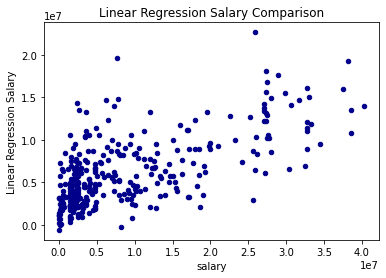

In [24]:
ln_model = valuationDF.plot.scatter(x='salary',
                                    y='Linear Regression Salary',
                                    c='DarkBlue',
                                   title = 'Linear Regression Salary Comparison') 

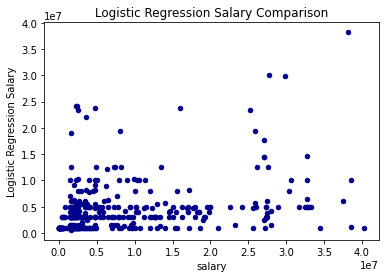

In [25]:
lg_model = valuationDF.plot.scatter(x='salary',
                                    y='Logistic Regression Salary',
                                    c='DarkBlue',
                                   title = 'Logistic Regression Salary Comparison') 

In [26]:
# Valuation Metric
valuationDF['Logistic Model Valuation %'] = (((valuationDF['salary'] - valuationDF['Logistic Regression Salary'])/valuationDF['Logistic Regression Salary'])*100).round(2)
valuationDF['Linear Model Valuation %'] = (((valuationDF['salary'] - valuationDF['Linear Regression Salary'])/valuationDF['Linear Regression Salary'])*100).round(2)

In [27]:
dfi.export(valuationDF, 'images/valuation.png', max_rows = 10)
valuationDF

,name,player_id,season_start,season_end,salary,Logistic Regression Salary,Linear Regression Salary,Logistic Model Valuation %,Linear Model Valuation %
0,Vince Carter,cartevi01,2019,2020,2564753.0,1000000.0,3028145.0,156.48,-15.30
1,Jamal Crawford,crawfja01,2019,2020,289803.0,1000000.0,2011936.0,-71.02,-85.60
2,Tyson Chandler,chandty01,2019,2020,2564753.0,10250000.0,1165956.0,-74.98,119.97
3,Carmelo Anthony,anthoca01,2019,2020,2159029.0,3000000.0,9521058.0,-28.03,-77.32
4,LeBron James,jamesle01,2019,2020,37436858.0,6000000.0,16011255.0,523.95,133.82
...,...,...,...,...,...,...,...,...,...
349,Brad Wanamaker,wanambr01,2019,2020,1445697.0,7000000.0,2165037.0,-79.35,-33.23
350,Yuta Watanabe,watanyu01,2019,2020,79568.0,1000000.0,1169664.0,-92.04,-93.20
351,Johnathan Williams,willijo04,2019,2020,161245.0,1000000.0,2488785.0,-83.88,-93.52
352,Kenrich Williams,willike04,2019,2020,1416852.0,1352181.0,3221642.0,4.78,-56.02


In [28]:
overValued_ln = valuationDF.sort_values(by=['Linear Model Valuation %'], ascending=False).head(10)
overValued_ln = overValued_ln[['name','player_id','season_start','season_end', 'salary','Linear Regression Salary','Linear Model Valuation %']]
dfi.export(overValued_ln, 'images/overvalued1.png', max_rows = 10)
overValued_ln

,name,player_id,season_start,season_end,salary,Linear Regression Salary,Linear Model Valuation %
312,Matthew Dellavedova,dellama01,2019,2020,9607500.0,777703.0,1135.37
65,Evan Turner,turneev01,2019,2020,18606556.0,2130283.0,773.43
29,Nicolas Batum,batumni01,2019,2020,25565217.0,2960321.0,763.60
36,Courtney Lee,leeco01,2019,2020,12759670.0,1927276.0,562.06
75,Cory Joseph,josepco01,2019,2020,12000000.0,2095924.0,472.54
55,Jeff Teague,teaguje01,2019,2020,19000000.0,3524713.0,439.05
8,Andre Iguodala,iguodan01,2019,2020,17185185.0,3270470.0,425.47
68,Bismack Biyombo,biyombi01,2019,2020,17000000.0,3248512.0,423.32
22,Mike Conley,conlemi01,2019,2020,32511623.0,6916073.0,370.09
16,Paul Millsap,millspa01,2019,2020,30350000.0,6533981.0,364.49


In [29]:
overValued_lg = valuationDF.sort_values(by=['Logistic Model Valuation %'], ascending=False).head(10)
overValued_lg = overValued_lg[['name','player_id','season_start','season_end', 'salary','Logistic Regression Salary','Logistic Model Valuation %']]
dfi.export(overValued_lg, 'images/overvalued2.png', max_rows = 10)
overValued_lg

,name,player_id,season_start,season_end,salary,Logistic Regression Salary,Logistic Model Valuation %
45,Stephen Curry,curryst01,2019,2020,40231758.0,1000000.0,3923.18
42,Russell Westbrook,westbru01,2019,2020,38506482.0,1100000.0,3400.59
50,Blake Griffin,griffbl01,2019,2020,34449964.0,1000000.0,3345.00
126,Otto Porter,porteot01,2019,2020,27250576.0,1000000.0,2625.06
29,Nicolas Batum,batumni01,2019,2020,25565217.0,1000000.0,2456.52
123,Victor Oladipo,oladivi01,2019,2020,21000000.0,1000000.0,2000.00
84,Nikola Vucevic,vucevni01,2019,2020,28000000.0,1471382.0,1802.97
65,Evan Turner,turneev01,2019,2020,18606556.0,1000000.0,1760.66
8,Andre Iguodala,iguodan01,2019,2020,17185185.0,1000000.0,1618.52
34,Serge Ibaka,ibakase01,2019,2020,23271604.0,1471382.0,1481.62


In [30]:
underValued_ln = valuationDF.sort_values(by=['Linear Model Valuation %'], ascending=False).tail(10)
underValued_ln = underValued_ln[['name','player_id','season_start','season_end', 'salary','Linear Regression Salary','Linear Model Valuation %']]
dfi.export(underValued_ln, 'images/undervalued1.png', max_rows = 10)
underValued_ln

,name,player_id,season_start,season_end,salary,Linear Regression Salary,Linear Model Valuation %
328,Tyler Johnson,johnsty01,2019,2020,183115.0,3067766.0,-94.03
105,Dion Waiters,waitedi01,2019,2020,375385.0,6525526.0,-94.25
250,Sindarius Thornwell,thornsi01,2019,2020,183115.0,4644199.0,-96.06
187,Dragan Bender,bendedr01,2019,2020,189700.0,5719990.0,-96.68
175,Cameron Payne,payneca01,2019,2020,196288.0,7291574.0,-97.31
303,Chris Chiozza,chiozch01,2019,2020,79568.0,3143266.0,-97.47
313,Drew Eubanks,eubandr01,2019,2020,79568.0,3189857.0,-97.51
321,Josh Gray,grayjo01,2019,2020,79568.0,-612573.0,-112.99
302,Joe Chealey,chealjo01,2019,2020,163356.0,-58450.0,-379.48
314,Cristiano Felicio,feliccr01,2019,2020,8156500.0,-251705.0,-3340.50


In [31]:
underValued_lg = valuationDF.sort_values(by=['Logistic Model Valuation %'], ascending=False).tail(10)
underValued_lg = underValued_lg[['name','player_id','season_start','season_end', 'salary','Logistic Regression Salary','Logistic Model Valuation %']]
dfi.export(underValued_lg, 'images/undervalued2.png', max_rows = 10)
underValued_lg

,name,player_id,season_start,season_end,salary,Logistic Regression Salary,Logistic Model Valuation %
220,Jonah Bolden,boldejo01,2019,2020,89846.0,1000000.0,-91.02
353,Christian Wood,woodch01,2019,2020,1645357.0,19067500.0,-91.37
348,Derrick Walton,waltode01,2019,2020,81678.0,1000000.0,-91.83
253,Kostas Antetokounmpo,antetko01,2019,2020,79568.0,1000000.0,-92.04
337,Johnathan Motley,motlejo01,2019,2020,79568.0,1000000.0,-92.04
321,Josh Gray,grayjo01,2019,2020,79568.0,1000000.0,-92.04
313,Drew Eubanks,eubandr01,2019,2020,79568.0,1000000.0,-92.04
350,Yuta Watanabe,watanyu01,2019,2020,79568.0,1000000.0,-92.04
305,Antonius Cleveland,clevean01,2019,2020,79568.0,1000000.0,-92.04
303,Chris Chiozza,chiozch01,2019,2020,79568.0,1000000.0,-92.04


In [45]:
fairValued_ln = valuationDF.sort_values(by=['Linear Model Valuation %'], ascending = False)
fairValued_ln = fairValued_ln[['name','player_id','season_start','season_end', 'salary','Linear Regression Salary','Linear Model Valuation %']]
fairValued_ln = fairValued_ln.loc[fairValued_ln['Linear Model Valuation %'] <= 5]
fairValued_ln = fairValued_ln.loc[fairValued_ln['Linear Model Valuation %'] >= -5]
dfi.export(fairValued_ln, 'images/fairvalued1.png', max_rows = 10)
fairValued_ln.head(10) # Closest to a 0% difference

,name,player_id,season_start,season_end,salary,Linear Regression Salary,Linear Model Valuation %
265,Jacob Evans,evansja02,2019,2020,1925880.0,1844998.0,4.38
132,Bogdan Bogdanovic,bogdabo01,2019,2020,8529386.0,8232070.0,3.61
59,Avery Bradley,bradlav01,2019,2020,4767000.0,4615302.0,3.29
307,Robert Covington,covinro01,2019,2020,11301219.0,11105049.0,1.77
109,Reggie Bullock,bullore01,2019,2020,4000000.0,3951085.0,1.24
257,Mikal Bridges,bridgmi01,2019,2020,4161000.0,4180579.0,-0.47
325,Justin Holiday,holidju01,2019,2020,4767000.0,4796591.0,-0.62
209,Ben Simmons,simmobe01,2019,2020,8113929.0,8200166.0,-1.05
347,Fred VanVleet,vanvlfr01,2019,2020,9346153.0,9473794.0,-1.35
224,Thomas Bryant,bryanth01,2019,2020,8000000.0,8331170.0,-3.98


In [42]:
fairValued_lg = valuationDF.sort_values(by=['Logistic Model Valuation %'], ascending = False)
fairValued_lg = fairValued_lg[['name','player_id','season_start','season_end', 'salary','Logistic Regression Salary','Logistic Model Valuation %']]
fairValued_lg = fairValued_lg.loc[fairValued_lg['Logistic Model Valuation %'] <= 5]
fairValued_lg = fairValued_lg.loc[fairValued_lg['Logistic Model Valuation %'] >= -5]
fairValued_lg.head(10) # Closest to a 0% difference
dfi.export(fairValued_lg, 'images/fairvalued2.png', max_rows = 10)

In [43]:
fairValued_lg

,name,player_id,season_start,season_end,salary,Logistic Regression Salary,Logistic Model Valuation %
352,Kenrich Williams,willike04,2019,2020,1416852.0,1352181.0,4.78
136,Spencer Dinwiddie,dinwisp01,2019,2020,10605600.0,10130000.0,4.69
213,Ivica Zubac,zubaciv01,2019,2020,6481482.0,6216840.0,4.26
152,Dwight Powell,poweldw01,2019,2020,10259375.0,10000000.0,2.59
98,Damian Lillard,lillada01,2019,2020,29802321.0,29802321.0,0.00
322,JaMychal Green,greenja01,2019,2020,4767000.0,4767000.0,0.00
294,Ryan Arcidiacono,arcidry01,2019,2020,3000000.0,3000000.0,0.00
51,James Harden,hardeja01,2019,2020,38199000.0,38199000.0,0.00
162,Montrezl Harrell,harremo01,2019,2020,6000000.0,6000000.0,0.00
263,Donte DiVincenzo,divindo01,2019,2020,2905800.0,3000000.0,-3.14
